In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv('Data/crime_cleaned_modeling.csv')
df.head()

,CrimeCode,Description,Post,District,Neighborhood,Location 1,Date,Year,Month,Day,vio_prop,weapon_used,vacation,StandardizedTime,Hour,Minute
0,0,0,424.0,2,175,"(39.3679000000, -76.5555900000)",2016-06-18,2016,6,18,1,1,True,00:33,0,33
1,0,1,232.0,5,32,"(39.2831500000, -76.5783400000)",2016-06-18,2016,6,18,1,1,True,00:39,0,39
2,8,1,532.0,3,138,"(39.3510400000, -76.6597600000)",2016-06-18,2016,6,18,1,1,True,15:00,15,0
3,6,1,221.0,5,151,"(39.2955600000, -76.5844600000)",2016-06-18,2016,6,18,1,1,True,01:53,1,53
4,5,0,321.0,1,157,"(39.3002700000, -76.5909700000)",2016-06-18,2016,6,18,0,0,True,02:05,2,5


In [3]:
df.drop(['Location 1'], axis=1, inplace=True)
df.head()

,CrimeCode,Description,Post,District,Neighborhood,Date,Year,Month,Day,vio_prop,weapon_used,vacation,StandardizedTime,Hour,Minute
0,0,0,424.0,2,175,2016-06-18,2016,6,18,1,1,True,00:33,0,33
1,0,1,232.0,5,32,2016-06-18,2016,6,18,1,1,True,00:39,0,39
2,8,1,532.0,3,138,2016-06-18,2016,6,18,1,1,True,15:00,15,0
3,6,1,221.0,5,151,2016-06-18,2016,6,18,1,1,True,01:53,1,53
4,5,0,321.0,1,157,2016-06-18,2016,6,18,0,0,True,02:05,2,5


Creating new Columns 

In [4]:
# creat a new column for the number of times a crime has been committed in a district per day
df['crime_count'] = df.groupby(['District', 'Date'])['CrimeCode'].transform('count')
df.head()

,CrimeCode,Description,Post,District,Neighborhood,Date,Year,Month,Day,vio_prop,weapon_used,vacation,StandardizedTime,Hour,Minute,crime_count
0,0,0,424.0,2,175,2016-06-18,2016,6,18,1,1,True,00:33,0,33,10
1,0,1,232.0,5,32,2016-06-18,2016,6,18,1,1,True,00:39,0,39,13
2,8,1,532.0,3,138,2016-06-18,2016,6,18,1,1,True,15:00,15,0,8
3,6,1,221.0,5,151,2016-06-18,2016,6,18,1,1,True,01:53,1,53,13
4,5,0,321.0,1,157,2016-06-18,2016,6,18,0,0,True,02:05,2,5,9


dropping all features associated with crimeCode classification since this is a different approach in which crime-specific data does not mattar

In [5]:
df.drop(['Date', 'StandardizedTime'], axis=1, inplace=True)

In [6]:
df.drop(['CrimeCode'], axis=1, inplace=True)

In [7]:
df.drop(['weapon_used', 'vio_prop'], axis=1, inplace=True)

In [9]:
df.drop(['Post', 'Description'], axis=1, inplace=True)    

In [8]:
df.drop(['Hour','Minute'], axis=1, inplace=True)

In [10]:
df.drop(['Neighborhood'], axis=1, inplace=True)

In [11]:
df.head()

,District,Year,Month,Day,vacation,crime_count
0,2,2016,6,18,True,10
1,5,2016,6,18,True,13
2,3,2016,6,18,True,8
3,5,2016,6,18,True,13
4,1,2016,6,18,True,9


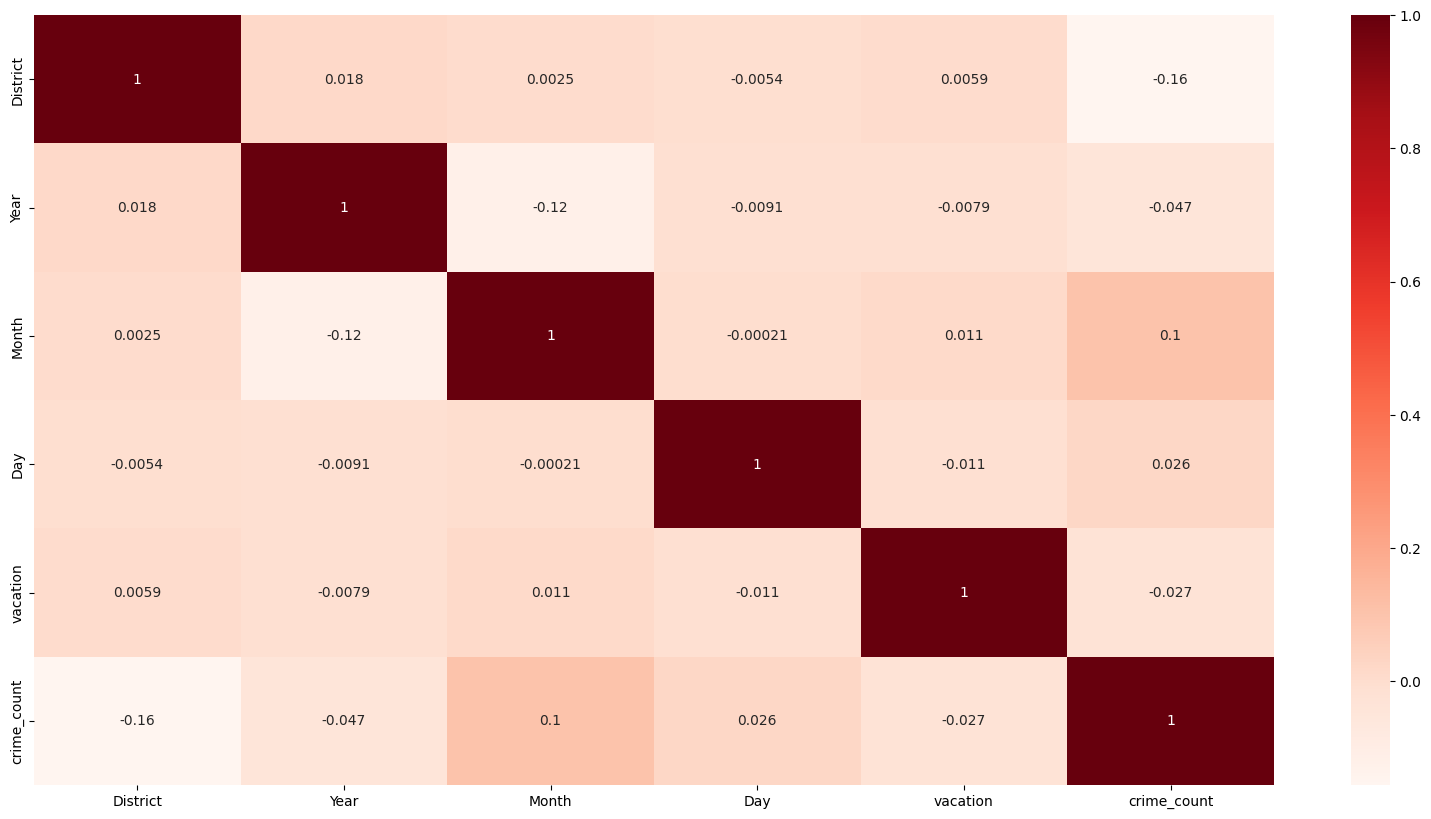

In [12]:
#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Label encoding the year feature since its values will dominate the rest of the features in distance calcualtions


In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

categorical_cols = ['Year']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    
    label_encoders[col] = le
    
for col, le in label_encoders.items():
    classes = le.classes_
    encoded_values = le.transform(classes)


    mapping = dict(zip(classes, encoded_values))
    print(f"Mapping for '{col}': {mapping}")

Mapping for 'Year': {2011: 0, 2012: 1, 2013: 2, 2014: 3, 2015: 4, 2016: 5}


Dropping all instances of 2016

In [14]:
df = df[df.Year != 5]

In [15]:
df['Year'].value_counts()

Year
0    50651
1    49561
2    49542
4    48711
3    45958
Name: count, dtype: int64

Predicting the Total Crime per day per disrict

In [16]:
df.head()

,District,Year,Month,Day,vacation,crime_count
20073,6,4,12,31,False,11
20074,1,4,12,31,False,10
20075,6,4,12,31,False,11
20076,7,4,12,31,False,6
20077,4,4,12,31,False,14


In [17]:
Features = ['District', 'Year', 'Month', 'Day', 'vacation']
print('Full Features: ', Features)

Full Features:  ['District', 'Year', 'Month', 'Day', 'vacation']


In [18]:
Target = ['crime_count']
print('Target: ', Target)

Target:  ['crime_count']


In [19]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
Index: 244423 entries, 20073 to 264495
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   District     244423 non-null  int64
 1   Year         244423 non-null  int64
 2   Month        244423 non-null  int64
 3   Day          244423 non-null  int64
 4   vacation     244423 non-null  bool 
 5   crime_count  244423 non-null  int64
dtypes: bool(1), int64(5)
memory usage: 11.4 MB


In [20]:
# Dropping all dubplicates
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16485 entries, 20073 to 264336
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   District     16485 non-null  int64
 1   Year         16485 non-null  int64
 2   Month        16485 non-null  int64
 3   Day          16485 non-null  int64
 4   vacation     16485 non-null  bool 
 5   crime_count  16485 non-null  int64
dtypes: bool(1), int64(5)
memory usage: 788.8 KB


In [21]:
train_set, test_set = train_test_split(df, 
                                       test_size=0.2, 
                                       train_size=0.8, 
                                       random_state=3)

train_features = train_set[Features]    # Features for training
train_target = train_set[Target]        # Target variable for training
test_features = test_set[Features]      # Features for testing
test_target = test_set[Target]          # Target variable for testing

print('Feature Set Used    : ', Features)
print('Target Class        : ', Target)
print('Training Features Set Size : ', train_features.shape)
print('Training Target Set Size   : ', train_target.shape)
print('Test Features Set Size     : ', test_features.shape)
print('Test Target Set Size       : ', test_target.shape)

Feature Set Used    :  ['District', 'Year', 'Month', 'Day', 'vacation']
Target Class        :  ['crime_count']
Training Features Set Size :  (13188, 5)
Training Target Set Size   :  (13188, 1)
Test Features Set Size     :  (3297, 5)
Test Target Set Size       :  (3297, 1)


baseline model - provides a baseline model performance using the mean value of the target variable from the training set, which is a common approach for establishing a basic benchmark for regression tasks.

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error

mean_total_crimes = train_target.mean()

# Creating an array of predictions based on the mean value, matching the length of the test set
baseline_predictions = np.full_like(test_target, fill_value=mean_total_crimes)

# Calculating the Mean Squared Error and Root Mean Squared Error for the baseline
baseline_mse = mean_squared_error(test_target, baseline_predictions)
baseline_rmse = np.sqrt(baseline_mse)
baseline_r2 = r2_score(test_target, baseline_predictions)
baseline_mae = mean_absolute_error(test_target, baseline_predictions)


# Printing the baseline errors
print(f"Baseline R^2 Score: {baseline_r2}")
print(f"Baseline Mean Absolute Error: {baseline_mae}")
print(f"Baseline Mean Squared Error: {baseline_mse}")
print(f"Baseline Root Mean Squared Error: {baseline_rmse}")

Baseline R^2 Score: -0.014925074365019775
Baseline Mean Absolute Error: 4.655141037306643
Baseline Mean Squared Error: 36.21352744919624
Baseline Root Mean Squared Error: 6.017767646660698


Simple linear regression 

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error

lr = LinearRegression()
lr.fit(train_features, train_target)

y_pred = lr.predict(test_features)

mse = mean_squared_error(test_target, y_pred)
rmse = np.sqrt(mse)
lr_r2 = r2_score(test_target, y_pred)
lr_mae = mean_absolute_error(test_target, y_pred)

print(f"Linear Regression Mean Squared Error: {mse}")
print(f"Linear Regression Root Mean Squared Error: {rmse}")
print(f"Linear Regression R^2 Score: {lr_r2}")
print(f"Linear Regression Mean Absolute Error: {lr_mae}")

Linear Regression Mean Squared Error: 33.72403297302196
Linear Regression Root Mean Squared Error: 5.807239703423819
Linear Regression R^2 Score: 0.05484582464246035
Linear Regression Mean Absolute Error: 4.544624205738297


XGBoost regression

In [24]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error

# Initialize the XGBoost Regressor model
model = XGBRegressor()

# Fit the model to the training data
model.fit(train_features, train_target)

# Predict on training data
training_data_prediction = model.predict(train_features)

# Calculate R^2 Score and Mean Absolute Error on training data
r2 = r2_score(train_target, training_data_prediction)
mae = mean_absolute_error(train_target, training_data_prediction)
xgb_mse = mean_squared_error(train_target, training_data_prediction)
xgb_rmse = np.sqrt(xgb_mse)

# Print the metrics
print(f"R^2 Score on Training Data: {r2}")
print(f"Mean Absolute Error on Training Data: {mae}")
print(f"XGBoost Mean Squared Error: {xgb_mse}")
print(f"XGBoost Root Mean Squared Error: {xgb_rmse}")

R^2 Score on Training Data: 0.5907867800186899
Mean Absolute Error on Training Data: 3.0553028226765377
XGBoost Mean Squared Error: 15.396923796577882
XGBoost Root Mean Squared Error: 3.9238914098860946


In [25]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Initialize and train the XGBoost Regressor model
model = XGBRegressor()
model.fit(train_features, train_target)

# Predict on testing data
testing_data_prediction = model.predict(test_features)

# Calculate R^2 Score and Mean Absolute Error on testing data
r2_test = r2_score(test_target, testing_data_prediction)
mae_test = mean_absolute_error(test_target, testing_data_prediction)
xgb_mse = mean_squared_error(test_target, testing_data_prediction)
xgb_rmse = np.sqrt(xgb_mse)


# Print the metrics for the test data
print(f"R^2 Score on Testing Data: {r2_test}")
print(f"Mean Absolute Error on Testing Data: {mae_test}")
print(f"XGBoost Mean Squared Error: {xgb_mse}")
print(f"XGBoost Root Mean Squared Error: {xgb_rmse}")

R^2 Score on Testing Data: 0.38490199294211025
Mean Absolute Error on Testing Data: 3.6633835878988124
XGBoost Mean Squared Error: 21.94730342678044
XGBoost Root Mean Squared Error: 4.684794918326782


5-fold cross-validation on a RandomForestRegressor

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,make_scorer


X = df[Features]  
y = df[Target] 

model = RandomForestRegressor()

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = cross_val_score(model, X, y, cv=5, scoring=make_scorer(rmse, greater_is_better=False))
r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
mae_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

mse_scores = -mse_scores
mae_scores = -mae_scores

print(f"Average MSE: {np.mean(mse_scores)}")
print(f"Standard Deviation of MSE: {np.std(mse_scores)}")

print(f"Average RMSE: {np.mean(rmse_scores)}")
print(f"Standard Deviation of RMSE: {np.std(rmse_scores)}")

print(f"Average R² Score: {np.mean(r2_scores)}")
print(f"Standard Deviation of R² Score: {np.std(r2_scores)}")

print(f"Average MAE: {np.mean(mae_scores)}")
print(f"Standard Deviation of MAE: {np.std(mae_scores)}")

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to 

Average MSE: 31.632918616924478
Standard Deviation of MSE: 2.7367883131247717
Average RMSE: -5.618185508025941
Standard Deviation of RMSE: 0.2348296426587502
Average R² Score: 0.1434056065783891
Standard Deviation of R² Score: 0.039890861177052074
Average MAE: 4.341144676979072
Standard Deviation of MAE: 0.0882909060599209


Handling outliers

C:\Users\acer\AppData\Local\Temp\ipykernel_11308\2852293507.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['crime_count'])


<Axes: xlabel='crime_count', ylabel='Density'>

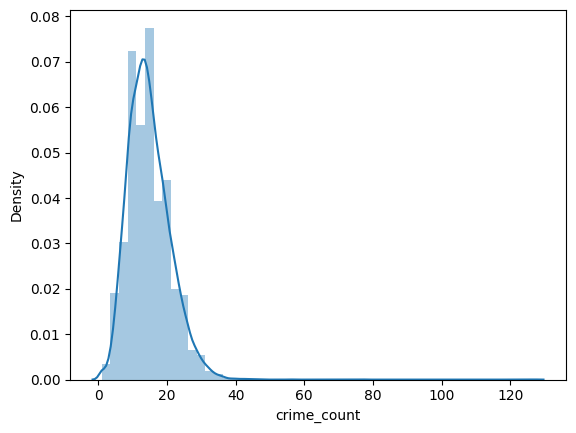

In [27]:
# descript the total column
df['crime_count'].describe()

# distribution of total column
sns.distplot(df['crime_count'])

C:\Users\acer\AppData\Local\Temp\ipykernel_11308\1421430830.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['crime_count'])


<Axes: xlabel='crime_count', ylabel='Density'>

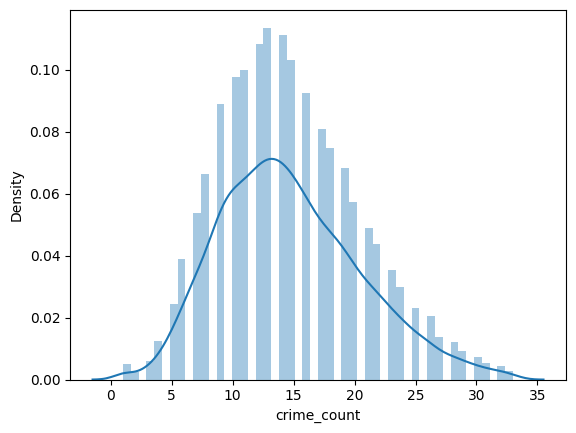

In [28]:
df = df[np.abs(df.crime_count-df.crime_count.mean()) <= (3*df.crime_count.std())]

# distribution of total column after removing outliers
sns.distplot(df['crime_count'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16399 entries, 20073 to 264336
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   District     16399 non-null  int64
 1   Year         16399 non-null  int64
 2   Month        16399 non-null  int64
 3   Day          16399 non-null  int64
 4   vacation     16399 non-null  bool 
 5   crime_count  16399 non-null  int64
dtypes: bool(1), int64(5)
memory usage: 784.7 KB


In [30]:
train_set, test_set = train_test_split(df, 
                                       test_size=0.2, 
                                       train_size=0.8, 
                                       random_state=3)

train_features = train_set[Features]    # Features for training
train_target = train_set[Target]        # Target variable for training
test_features = test_set[Features]      # Features for testing
test_target = test_set[Target]          # Target variable for testing

print('Feature Set Used    : ', Features)
print('Target Class        : ', Target)
print('Training Features Set Size : ', train_features.shape)
print('Training Target Set Size   : ', train_target.shape)
print('Test Features Set Size     : ', test_features.shape)
print('Test Target Set Size       : ', test_target.shape)

Feature Set Used    :  ['District', 'Year', 'Month', 'Day', 'vacation']
Target Class        :  ['crime_count']
Training Features Set Size :  (13119, 5)
Training Target Set Size   :  (13119, 1)
Test Features Set Size     :  (3280, 5)
Test Target Set Size       :  (3280, 1)


Testing the models again

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(train_features, train_target)

y_pred = lr.predict(test_features)

mse = mean_squared_error(test_target, y_pred)
rmse = np.sqrt(mse)
lr_r2 = r2_score(test_target, y_pred)
lr_mae = mean_absolute_error(test_target, y_pred)

# Print the additional metrics
print(f"Linear Regression R^2 Score: {lr_r2}")
print(f"Linear Regression Mean Absolute Error: {lr_mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Linear Regression R^2 Score: 0.07166660321476392
Linear Regression Mean Absolute Error: 4.503085166819293
Mean Squared Error: 32.089077794999746
Root Mean Squared Error: 5.664722216931714


In [34]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Initialize the XGBoost Regressor model
model = XGBRegressor()

# Fit the model to the training data
model.fit(train_features, train_target)

# Predict on training data
training_data_prediction = model.predict(train_features)

# Calculate R^2 Score and Mean Absolute Error on training data
r2 = r2_score(train_target, training_data_prediction)
mae = mean_absolute_error(train_target, training_data_prediction)
xgb_mse = mean_squared_error(train_target, training_data_prediction)
xgb_rmse = np.sqrt(xgb_mse)

# Print the additional metrics
print(f"XGBoost Mean Squared Error: {xgb_mse}")
print(f"XGBoost Root Mean Squared Error: {xgb_rmse}")
print(f"R^2 Score on Training Data: {r2}")
print(f"Mean Absolute Error on Training Data: {mae}")

XGBoost Mean Squared Error: 14.104137187106328
XGBoost Root Mean Squared Error: 3.7555475216147016
R^2 Score on Training Data: 0.5797844247142095
Mean Absolute Error on Training Data: 2.9740809358390052


In [33]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Initialize and train the XGBoost Regressor model
model = XGBRegressor()
model.fit(train_features, train_target)

# Predict on testing data
testing_data_prediction = model.predict(test_features)

# Calculate R^2 Score and Mean Absolute Error on testing data
r2_test = r2_score(test_target, testing_data_prediction)
mae_test = mean_absolute_error(test_target, testing_data_prediction)
xgb_mse = mean_squared_error(test_target, testing_data_prediction)
xgb_rmse = np.sqrt(xgb_mse)

# Print the additional metrics
print(f"XGBoost Mean Squared Error: {xgb_mse}")
print(f"XGBoost Root Mean Squared Error: {xgb_rmse}")
print(f"R^2 Score on Testing Data: {r2_test}")
print(f"Mean Absolute Error on Testing Data: {mae_test}")

XGBoost Mean Squared Error: 20.74599033626378
XGBoost Root Mean Squared Error: 4.554776650535543
R^2 Score on Testing Data: 0.39982084241951976
Mean Absolute Error on Testing Data: 3.6477738969323292


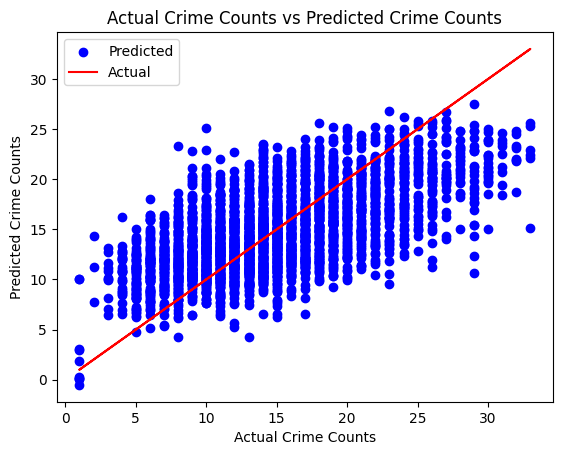

In [35]:
plt.scatter(test_target, testing_data_prediction, color='blue', label='Predicted')
plt.plot(test_target, test_target, color='red', label='Actual')  # Line of perfect prediction

plt.xlabel("Actual Crime Counts")
plt.ylabel("Predicted Crime Counts")
plt.title("Actual Crime Counts vs Predicted Crime Counts")
plt.legend()
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np


X = df[Features]  
y = df[Target] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor model
model = RandomForestRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error: 23.273205304878044
Root Mean Squared Error: 4.824231058404857
R^2 Score: 0.2799899344740321
Mean Absolute Error: 3.8409878048780484


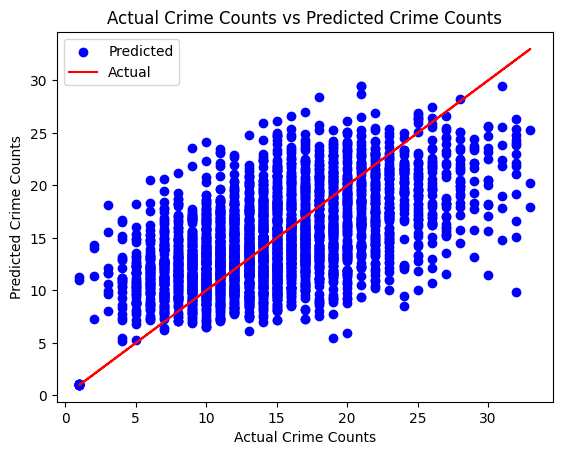

In [37]:
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', label='Actual')  # Line of perfect prediction

plt.xlabel("Actual Crime Counts")
plt.ylabel("Predicted Crime Counts")
plt.title("Actual Crime Counts vs Predicted Crime Counts")
plt.legend()
plt.show()